## Plotting a random trajectory using the Inverse Kinematics


In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import preprocessing

# 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Functions for plotting

In [3]:

# Functions for plotting
def plot_function(title, y, color, label, xlim_1, xlim_2, inter):
    plt.figure(figsize=(10,7))
    plt.title(title)
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Degrees")
    plt.xlim(xlim_1,xlim_2,inter)
    plt.plot(y, color = color, label = label)
    plt.legend()

    return plt.show()


def plot_two_functions(title, y1, y2, color1, color2, label1, label2):
    plt.figure(figsize=(7,5))
    plt.title(title)
    plt.grid()
    plt.xlabel("Tiempo")
    plt.ylabel("Inclinacion [grados]")
    plt.plot(y1, color = color1, label = label1)
    plt.plot(y2, color = color2, label = label2)
    plt.legend()

    return plt.show()


def plot_three_functions(title, x, y1, y2, y3, color1, color2, color3, label1, label2, label3):
    plt.figure(figsize=(15,10))
    plt.title(title)
    plt.grid()
    plt.xlabel("Time (m)")
    plt.ylabel("Motor angular position (rad)")
    plt.plot(x, y1, color = color1, label = label1)
    plt.plot(x, y2, color = color2, label = label2)
    plt.plot(x, y3, color = color3, label = label3)
    plt.legend()

    return plt.show()

## Grafica Trayectoria

In [32]:
#upload file
#data = pd.read_csv('/content/data_orient10.csv')
data_ik = pd.read_csv('/home/sofia/SOFIA_Python/data/Data_2023/data_february/data_orient10_MASTER_28_trajectoryPentagono.csv')
#data = shuffle(data)


In [33]:
data_ik

,Inclination,Orientation,M1,M2,M3
0,6.112560,89.998446,-0.009460,0.003324,0.004346
1,3.615213,68.373037,-0.021731,0.016874,0.020070
2,3.351947,33.933223,-0.048704,0.044485,0.044997
3,3.455307,17.450006,-0.080406,0.078617,0.078361
4,4.431074,6.710304,-0.131922,0.119651,0.128087
...,...,...,...,...,...
571,11.942724,205.820316,2.014372,0.156466,-0.545969
572,12.431193,211.435694,2.001717,0.297720,-0.680065
573,12.997248,216.282553,1.989062,0.426830,-0.785015
574,13.375729,221.635071,1.961834,0.589816,-0.900447


In [34]:

#contantes
L0 = 0.107 #m longitud comprimida

OPo_x = []
OPo_y = []
OPo_z = []


for i in range(1, 576, 1):
  the_number = math.radians(data_ik.iat[(i*1)-1,0])
  psi_number = math.radians(data_ik.iat[(i*1)-1,1])
  s0_number = L0*(1-math.cos(the_number))/the_number
  t0_number = L0*math.sin(the_number)/the_number

  OPo_x_num = s0_number*math.cos(psi_number)
  OPo_y_num = s0_number*math.sin(psi_number)
  OPo_x.append(OPo_x_num)
  OPo_y.append(OPo_y_num)
  OPo_z.append(t0_number)



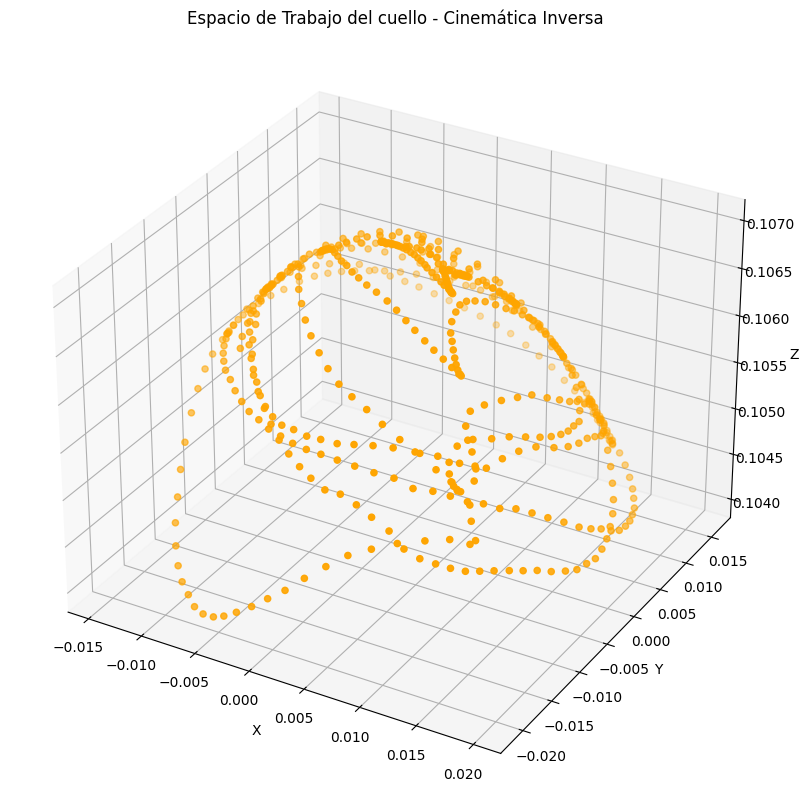

In [35]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style


from matplotlib import style

# Creamos la figura
fig = plt.figure(figsize = (10, 10))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.title.set_text('Espacio de Trabajo del cuello - Cinemática Inversa')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Mostramos el gráfico
ax1.scatter(OPo_x, OPo_y, OPo_z, c='orange', marker='o')

# Reassign rotation angles to 0
# ax1.azim, ax1.elev = 90, 90
plt.show()

In [36]:
col_incli = ['I']
col_orient = ['O']
incli = []
orient = []

for i in range(5,41,5):
  for o in range(5,361,10):
    for repeat in range(2):
      incli.append(i)
      orient.append(o)

#Convert the inclination and orientation to a df
df_incli = pd.DataFrame(incli, columns=col_incli)
df_orient = pd.DataFrame(orient, columns=col_orient)

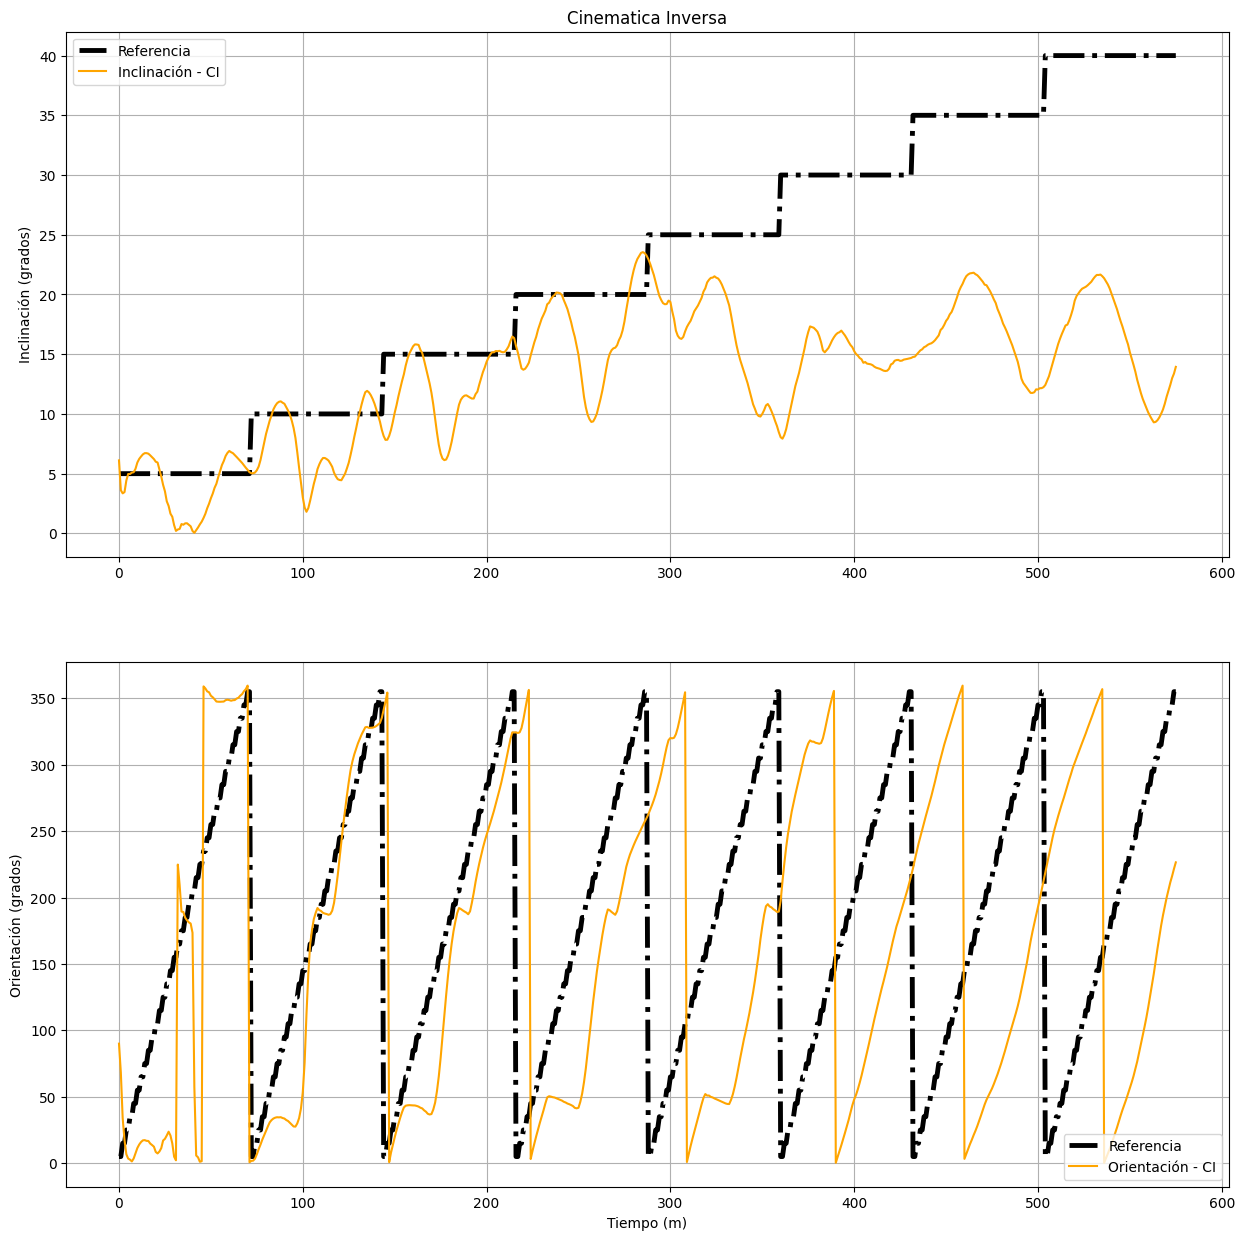

In [37]:
xx = [i/1 for i in range(576)]
def plot_two_function(title, x, y1_1, y1_2, y2_1, y2_2, color1, color2, label1, label2, label3):
    plt.figure(figsize=(15,15))
    
    plt.subplot(2, 1, 1)
    plt.grid()
    plt.plot(x, y1_1, color = color1, label = label1, linestyle = 'dashdot', linewidth = 3.5)
    plt.plot(x, y1_2, color = color2, label = label2, linewidth = 1.5)
    plt.ylabel("Inclinación (grados)")
    plt.title(title)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.grid()
    plt.xlabel("Tiempo (m)")
    plt.ylabel("Orientación (grados)")
    plt.plot(x, y2_1, color = color1, label = label1, linestyle = 'dashdot', linewidth = 3.5)
    plt.plot(x, y2_2, color = color2, label = label3, linewidth = 1.5)
    plt.legend()
    plt.savefig(r'ik.png')
    return plt.show()

plot_two_function("Cinematica Inversa", xx,
                 df_incli['I'],data_ik['Inclination'],df_orient,data_ik['Orientation'],
                 "black", "orange", 
                 "Referencia","Inclinación - CI","Orientación - CI")

# Mirar esta gráfica (tenemos demasiado error!!!)